In [1]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential                                             

In [2]:
# loading the dataset 
from tensorflow.keras import datasets
(train_img, train_lab), (test_img, test_lab) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


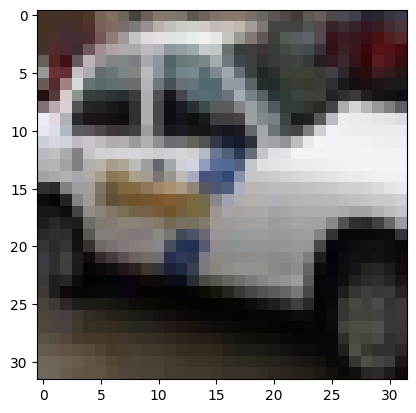

In [3]:
#plotting an image from data
import matplotlib.pyplot as plt
plt.imshow(train_img[2005])

In [4]:
train_img[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
train_img.shape

(50000, 32, 32, 3)

In [6]:
# normalizing the images 
train_img = train_img/255.0
test_img = test_img/255.0

In [7]:
train_img[7]

array([[[0.10980392, 0.1372549 , 0.15294118],
        [0.11764706, 0.13333333, 0.17254902],
        [0.12941176, 0.17254902, 0.18431373],
        ...,
        [0.16862745, 0.21960784, 0.17647059],
        [0.20392157, 0.25098039, 0.20784314],
        [0.18039216, 0.22745098, 0.18431373]],

       [[0.10588235, 0.11764706, 0.14901961],
        [0.10588235, 0.10980392, 0.16078431],
        [0.08235294, 0.12156863, 0.15294118],
        ...,
        [0.43921569, 0.53333333, 0.38039216],
        [0.45882353, 0.54901961, 0.39607843],
        [0.45098039, 0.54117647, 0.39215686]],

       [[0.13333333, 0.14117647, 0.16470588],
        [0.12941176, 0.12941176, 0.16862745],
        [0.09411765, 0.11764706, 0.15686275],
        ...,
        [0.68627451, 0.81568627, 0.56078431],
        [0.69411765, 0.81960784, 0.56470588],
        [0.69019608, 0.81568627, 0.56078431]],

       ...,

       [[0.55686275, 0.69019608, 0.4627451 ],
        [0.55686275, 0.69019608, 0.4627451 ],
        [0.58823529, 0

In [8]:
train_img = train_img.astype('float32')
test_img = test_img.astype('float32')

In [9]:
from tensorflow.keras.layers import BatchNormalization

Model building

In [9]:
keras.backend.clear_session()
model1 = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
#Add another convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),

tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),


#Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
tf.keras.layers.Flatten(),
#The same 128 dense layers, and 10 output layers as in the pre-convolution example:
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [11]:
# compiling
from keras.utils import to_categorical

model1.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model1.fit(train_img, to_categorical(train_lab), epochs = 2, verbose = 1, validation_data = (test_img, to_categorical(test_lab)))

Epoch 1/2
1563/1563 [==============================] - 20s 6ms/step - loss: 1.4772 - accuracy: 0.4634 - val_loss: 1.2010 - val_accuracy: 0.5729
Epoch 2/2
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0841 - accuracy: 0.6173 - val_loss: 1.0243 - val_accuracy: 0.6449


In [12]:
import numpy as np

Intermediate layer model, before data is fed into the xgboost

In [13]:
flatten_model = tf.keras.Model(inputs = model1.inputs, outputs = model1.layers[6].output)

In [14]:
flatten_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856 

Values obtained from the flatten layer( Dataset for other models )

In [15]:
features_train = flatten_model.predict(train_img)

1563/1563 [==============================] - 3s 2ms/step


In [16]:
features_train[0]

array([0.        , 0.        , 0.        , 0.49329597, 0.62983495,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.7473633 , 0.972875  , 0.        , 0.29410318, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.57831943, 0.        , 0.        , 0.        , 0.        ,
       0.49271095, 0.        , 0.6433586 , 0.70790696, 0.46498024,
       0.21094416, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.707688  ,
       0.        , 0.        , 0.31148243, 0.        , 0.9353726 ,
       0.        , 0.80415285, 0.        , 0.        , 0.6834446 ,
       0.        , 0.        , 0.        , 0.0206577 , 0.        ,
       0.8313874 , 0.        , 0.        , 0.3927369 , 0.        ,
       0.        , 0.05240676, 0.15658095, 0.        , 0.24185

In [17]:
features_test = flatten_model.predict(test_img)

313/313 [==============================] - 1s 2ms/step


In [18]:
features_train.shape

(50000, 512)

In [19]:
features_test.shape

(10000, 512)

In [20]:
type(features_train)

numpy.ndarray

In [21]:
import pandas as pd

In [22]:
dataset = pd.DataFrame(features_train)

In [23]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.0,0.0,0.0,0.493296,0.629835,0.000000,0.000000,0.000000,0.0,0.000000,...,0.122511,0.477825,0.0,0.135111,0.0,0.000000,0.179653,0.0,0.0,0.707566
1,0.0,0.0,0.0,0.441265,0.000000,0.065924,1.082605,0.242105,0.0,0.137061,...,0.000000,0.007267,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.784829
2,0.0,0.0,0.0,0.744404,0.146030,0.000000,0.527143,0.000000,0.0,0.816240,...,0.163129,0.545806,0.0,0.000000,0.0,0.000000,0.137507,0.0,0.0,0.947773
3,0.0,0.0,0.0,0.322895,0.184838,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.693664,0.0,0.429647,0.0,0.097628,0.434761,0.0,0.0,0.438663
4,0.0,0.0,0.0,0.157811,0.080252,0.000000,0.164093,0.000000,0.0,0.000000,...,0.000000,1.418861,0.0,0.169740,0.0,0.000000,0.000000,0.0,0.0,1.162879


In [24]:
dataset['train_label'] = train_lab 

In [26]:
lab_train = dataset['train_label']

In [25]:
train_lab

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [28]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,train_label
0,0.0,0.0,0.0,0.493296,0.629835,0.000000,0.000000,0.000000,0.0,0.000000,...,0.477825,0.0,0.135111,0.0,0.000000,0.179653,0.0,0.0,0.707566,6
1,0.0,0.0,0.0,0.441265,0.000000,0.065924,1.082605,0.242105,0.0,0.137061,...,0.007267,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.784829,9
2,0.0,0.0,0.0,0.744404,0.146030,0.000000,0.527143,0.000000,0.0,0.816240,...,0.545806,0.0,0.000000,0.0,0.000000,0.137507,0.0,0.0,0.947773,9
3,0.0,0.0,0.0,0.322895,0.184838,0.000000,0.000000,0.000000,0.0,0.000000,...,0.693664,0.0,0.429647,0.0,0.097628,0.434761,0.0,0.0,0.438663,4
4,0.0,0.0,0.0,0.157811,0.080252,0.000000,0.164093,0.000000,0.0,0.000000,...,1.418861,0.0,0.169740,0.0,0.000000,0.000000,0.0,0.0,1.162879,1


In [29]:
dataset.shape

(50000, 513)

Below - 'f' stands for feature

In [30]:
train_f_labels = dataset['train_label']

In [31]:
train_f_labels = train_f_labels.values

Train dataset which will get fed into models

In [32]:
train_f = dataset.drop(labels = ['train_label'], axis = 1)

In [33]:
train_f = train_f.values

In [34]:
train_f

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.7075665 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.7848292 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.94777304],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.12106556],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.27280784],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.7535297 ]], dtype=float32)

In [35]:
import xgboost as xgb

In [40]:
xg = xgb.XGBClassifier(objective = 'multi:softmax', num_class=10, n_estimators = 100, max_depth = 4, learning_rate = 0.1)

# Now, Train features and labels : train_f, train_f_labels
##    Test features and labels : test_f, test_f_labels

In [41]:
xg.fit(train_f, train_f_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=10,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [37]:
train_f_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Test dataset

In [47]:
test_f = pd.DataFrame(features_test)

In [49]:
test_f.head(10)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.0,0.0,0.0,0.491068,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.314028,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.000000,0.000000,0.0,1.298788,0.000000,0.0,0.000000,...,0.000000,0.546450,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.211692
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.785201,0.125343,0.0,0.000000,...,0.000000,0.716498,0.0,0.066509,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.424195,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.066152,0.0,0.564521,0.0,0.000000,0.000000,0.0,0.0,0.650522
4,0.0,0.0,0.0,0.000000,0.791527,0.0,0.000000,0.036208,0.0,0.000000,...,0.630554,0.374637,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.150672
5,0.0,0.0,0.0,0.057062,0.000000,0.0,0.000000,0.000000,0.0,0.028712,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.320136,0.0,0.0,0.193125
6,0.0,0.0,0.0,0.000000,0.000000,0.0,1.010507,0.000000,0.0,0.000000,...,0.000000,0.157873,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.270918
7,0.0,0.0,0.0,0.091722,0.799515,0.0,0.000000,0.000000,0.0,0.000000,...,0.856983,0.301871,0.0,0.134252,0.0,0.139256,0.578731,0.0,0.0,0.250371
8,0.0,0.0,0.0,0.403434,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.025495,0.732309,0.0,0.322726,0.0,0.000000,0.000000,0.0,0.0,0.230992
9,0.0,0.0,0.0,0.368736,0.167414,0.0,0.348988,0.000000,0.0,0.000000,...,0.000000,0.139695,0.0,0.125926,0.0,0.000000,0.000000,0.0,0.0,0.425618


In [43]:
test_f_labels = test_lab

In [69]:
xg_predictions = xg.predict(test_f)

In [70]:
xg_predictions.shape

(10000,)

In [52]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy = accuracy_score(test_f_labels, xg_predictions)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.64


In [44]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import lightgbm as lgb

In [46]:
lgb_clf = lgb.LGBMClassifier()

In [50]:
lgb_clf.fit(train_f, train_f_labels)

LGBMClassifier()

In [56]:
lgb_pred = lgb_clf.predict(test_f)

In [57]:
accuracy_lgb = accuracy_score(test_f_labels, lgb_pred)
print('Accuracy: {:.2f}'.format(accuracy_lgb))

Accuracy: 0.68


## Now, using CatBoost 

In [59]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.5 MB/s eta 0:00:00


In [60]:
import catboost as cb

In [61]:
cb_clf = cb.CatBoostClassifier()

In [62]:
cb_clf.fit(train_f, train_f_labels)

Learning rate set to 0.096599
0:	learn: 2.1859311	total: 3.26s	remaining: 54m 13s
1:	learn: 2.0894578	total: 5.26s	remaining: 43m 44s
2:	learn: 2.0114004	total: 7.19s	remaining: 39m 49s
3:	learn: 1.9464813	total: 9.18s	remaining: 38m 5s
4:	learn: 1.8892506	total: 11.2s	remaining: 37m
5:	learn: 1.8403921	total: 13.5s	remaining: 37m 11s
6:	learn: 1.7930598	total: 16.3s	remaining: 38m 29s
7:	learn: 1.7517426	total: 18.2s	remaining: 37m 38s
8:	learn: 1.7125592	total: 20.2s	remaining: 37m 5s
9:	learn: 1.6775929	total: 22.2s	remaining: 36m 39s
10:	learn: 1.6473685	total: 24.2s	remaining: 36m 13s
11:	learn: 1.6186406	total: 26.7s	remaining: 36m 41s
12:	learn: 1.5923197	total: 29.3s	remaining: 37m 1s
13:	learn: 1.5684751	total: 31.3s	remaining: 36m 41s
14:	learn: 1.5493087	total: 33.3s	remaining: 36m 24s
15:	learn: 1.5282372	total: 35.3s	remaining: 36m 11s
16:	learn: 1.5081006	total: 37.3s	remaining: 35m 55s
17:	learn: 1.4899587	total: 40.2s	remaining: 36m 33s
18:	learn: 1.4726653	total: 42.4s

In [63]:
clf_pred = cb_clf.predict(test_f)

In [64]:
accuracy_clf = accuracy_score(test_f_labels, clf_pred)
print('Accuracy: {:.2f}'.format(accuracy_clf))

Accuracy: 0.69
